# SBAloans Big Data Modelling

In [13]:
#Checking file placement
import os 
os.getcwd()

'C:\\Users\\wowan\\OneDrive\\Skrivebord Bærebar\\BigData Exam\\bigdata'

## Import

In [33]:
#Importing modules and the processed .csv file, as done in the preprocessing phase.

# Data handling
import pandas as pd
import numpy as np

#training and test set
from sklearn.model_selection import train_test_split

# Evaluating classifiers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

#balancing dataset with SMOTE
from imblearn.over_sampling import SMOTE 

#Dummy classifier
from sklearn.dummy import DummyClassifier

# Accuracy score for training- and test set
from sklearn.metrics import accuracy_score


# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# For Scaling the dataset
from sklearn.preprocessing import MinMaxScaler

#Logistic regression // Cross validation
from sklearn.linear_model import LogisticRegressionCV

# Visulaization of data
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

#Classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [34]:
#Importing the processed .csv file

SBAloan_df = pd.read_csv('SBAnational_processed.csv', sep=',', dtype='unicode')

#Displaying data table
SBAloan_df.head()
SBAloan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164137 entries, 0 to 164136
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         164137 non-null  object
 1   State              164137 non-null  object
 2   BankState          164137 non-null  object
 3   NAICS              164137 non-null  object
 4   ApprovalFY         164137 non-null  object
 5   Term               164137 non-null  object
 6   NoEmp              164137 non-null  object
 7   NewExist           164137 non-null  object
 8   FranchiseCode      164137 non-null  object
 9   UrbanRural         164137 non-null  object
 10  LowDoc             164137 non-null  object
 11  DisbursementGross  164137 non-null  object
 12  MIS_Status         164137 non-null  object
dtypes: object(13)
memory usage: 16.3+ MB


### Defining target variable and baseline

In [35]:
#We start by creating a new DataFrame 'X' by selecting the columsn from the other DataFrame SBAloan_df
#We are leaving out Variable 'ApprovalFY' as it is not relevant

#Defining x
x = SBAloan_df[['State', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist', 'FranchiseCode', 'UrbanRural', 'LowDoc', 'DisbursementGross']]

#Defining Y (target variable) for machine learning
y = SBAloan_df['MIS_Status']

#Showing attributes
x.columns

Index(['State', 'BankState', 'NAICS', 'Term', 'NoEmp', 'NewExist',
       'FranchiseCode', 'UrbanRural', 'LowDoc', 'DisbursementGross'],
      dtype='object')

### Creating training- and test split

In [36]:
#Creating training- and test split of the data, with function from sklearn.model library

#splitting code intro training and test set, with 70% of data used for training and 30% for testing
#random seed is set to 42, for repoducibillity
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

x_train
x_test

,State,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,DisbursementGross
83743,21,7,23,144,1,1,0,2,0,49965
123822,7,9,42,36,3,1,0,2,0,689737
161120,6,1,11,12,5,2,0,1,0,3000000
131852,9,3,54,120,6,1,0,1,0,615000
74928,9,25,81,60,0,2,0,1,0,40000
...,...,...,...,...,...,...,...,...,...,...
2901,6,1,44,47,1,1,0,1,0,136496
134806,3,10,62,78,3,1,0,2,0,35000
128280,38,38,23,36,12,1,0,2,0,21400
5627,10,6,48,60,4,2,0,2,0,135644


###  Baselinemodel and evaluating accuracy of training- and test set

In [37]:
#Creating Dummy classificer, that trains on the training data, for use to predict target variable values on the test data.
#Predicted values are stored in DummyClass_y_prediction

DummyClass = DummyClassifier()
DummyClass.fit(x_train, y_train)
DummyClass_y_prediction = DummyClass.predict(x_test)

#Predicted values are stored in DummyClass_y_prediction



In [38]:
#Printing accuracy of the model on both training set and the test set.
#Accuracy indicates the proportion of correctly predicted instances in the model.

DummyClass_y_train_prediction = DummyClass.predict(x_train)
DummyClass_y_test_prediction = DummyClass.predict(x_test)

print(f"Accuracy training set: {accuracy_score(y_train, DummyClass_y_train_prediction):.3f}")
print(f"Accuracy test set: {accuracy_score(y_test, DummyClass_y_test_prediction):.3f}")


Accuracy training set: 0.675
Accuracy test set: 0.681


* As seen above, training set = 67,5% of the instances in the training set were predicted correctly by the dummy classifier

* As seen above, Test set = 68.1% of the instances in the test set were predicted correctly by the dummy classifier


In [39]:
#Now checking the balance of the data set
print(y.dtypes)

# Converting any NaN to numeric since dtype was an object
y = pd.to_numeric(y, errors='coerce')

# Calculate the sum of numeric values and divide by the total number of element
result = sum(y) / len(y)

print(result)

object
0.3234005739108184


* The result shows, that 32.34%  of the instances in the dataset belong to positive class

* This indicates that that the dataset needs to be balance, since it could impact the performance of the model


In [40]:
#First creating confusion_matrix, to compute matrix for classification model
conf_matrix = confusion_matrix(y_test, DummyClass_y_prediction)
print(conf_matrix)


#[TN,    FP]
#[FN     TP]

#High number of True Positives and True Negatives = good performance
#low number of False Positives and False Negatives = good performance


[[33538     0]
 [15704     0]]


As seen:

* True Negatives (TN): 33538 instances were correctly predicted as the negative class (0).

* False Negatives (FN): 13077 instances were incorrectly predicted as the negative class (0) when they were actually the positive class (1).



### Balancing dataset with SMOTE

In [41]:
smote = SMOTE(random_state=42)
x_SMOTE, y_SMOTE = smote.fit_resample(x,y)

result = sum(y_SMOTE)/len(y_SMOTE)
print(result)

0.5


SMOTE was applied to oversample, by generating synthetic examples.
the result of '0.5' suggest that the class distribution is now balanced
* With approxmitly equal number of instances for both positive and negative classes.
* This helps prevent the model from being biased toward the majority class

In [42]:
#Now where SMOTE has balanced the dataset, new training and data set, will be made

x_train, x_test, y_train, y_test = train_test_split(x_SMOTE, y_SMOTE, test_size=0.30, random_state=42)

x_train

,State,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,DisbursementGross
45010,33.0,1.0,53.0,42.0,1.0,1.0,0.0,2.0,0.0,49505.0
48434,13.0,15.0,52.0,64.0,3.0,1.0,0.0,1.0,0.0,59297.0
29816,12.0,5.0,81.0,18.0,3.0,1.0,0.0,2.0,0.0,45964.0
140273,14.0,8.0,23.0,24.0,2.0,2.0,0.0,1.0,0.0,350000.0
84152,2.0,4.0,23.0,84.0,2.0,2.0,0.0,1.0,0.0,5000.0
...,...,...,...,...,...,...,...,...,...,...
119879,10.0,18.0,44.0,84.0,2.0,2.0,0.0,2.0,0.0,58500.0
103694,30.0,24.0,54.0,36.0,4.0,1.0,0.0,2.0,0.0,25000.0
131932,11.0,12.0,44.0,40.0,4.0,1.0,0.0,2.0,0.0,35000.0
146867,8.0,13.0,62.0,84.0,5.0,1.0,0.0,1.0,0.0,70000.0


In [43]:
#removing decimals
x_train = x_train.astype(int)

#displaying data again
x_train


,State,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,DisbursementGross
45010,33,1,53,42,1,1,0,2,0,49505
48434,13,15,52,64,3,1,0,1,0,59297
29816,12,5,81,18,3,1,0,2,0,45964
140273,14,8,23,24,2,2,0,1,0,350000
84152,2,4,23,84,2,2,0,1,0,5000
...,...,...,...,...,...,...,...,...,...,...
119879,10,18,44,84,2,2,0,2,0,58500
103694,30,24,54,36,4,1,0,2,0,25000
131932,11,12,44,40,4,1,0,2,0,35000
146867,8,13,62,84,5,1,0,1,0,70000


In [44]:
#Creating Dummy classificer, that trains on the training data with new SMOTE dataset
DummyClass = DummyClassifier()
DummyClass.fit(x_train, y_train)
DummyClass_y_prediction = DummyClass.predict(x_test)

#Printing accuracy of the model on both training set and the test set after applying SMOTE
DummyClass_y_train_prediction = DummyClass.predict(x_train)
DummyClass_y_test_prediction = DummyClass.predict(x_test)

print(f"Accuracy training set: {accuracy_score(y_train, DummyClass_y_train_prediction):.3f}")
print(f"Accuracy test set: {accuracy_score(y_test, DummyClass_y_test_prediction):.3f}")


Accuracy training set: 0.501
Accuracy test set: 0.497


* As seen above, training set after SMOTE = 50% of the instances in the training set were predicted correctly by the dummy classifier

* As seen above, Test set after SMOTE= 49% of the instances in the test set were predicted correctly by the dummy classifier

## Binary classification

### LogisticRegression Class

In [45]:
#Creating an instance of LogisticRegression
LogR = LogisticRegression()

#Fitting the model on the training data
LogR.fit(x_train, y_train)

LogR_y_train_prediction = LogR.predict(x_train)
LogR_y_test_prediction = LogR.predict(x_test)

#Printing accuracy of the LogisticRegression model on both training set and the test set
print(f"Accuracy training set: {accuracy_score(y_train, LogR_y_train_prediction):.3f}")
print(f"Accuracy test set: {accuracy_score(y_test, LogR_y_test_prediction):.3f}")


Accuracy training set: 0.678
Accuracy test set: 0.675


* Accuracy on training set (0.674): Approximately 67% of the instances in training set were correctly predicted by the logistic regression model.

* Accuracy on test set (0.671): Approximately 67.1% of the instances test were correctly predicted by the logistic regression model.

* This is higher accuracy than the dummy classificer of 0.48 and 0.51

In [66]:
#Crossvalidating with K-folds, for creating the most optimal machine learning model.
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV

LogR_Cv = LogisticRegressionCV(

#cv: Stratified K-Folds. The default cross-validation generator used.
cv=10,
    
#random state: random seed is set to 42, for repoducibillity
random_state=42,

#max_iter: Maximum number of iterations of the optimization algorithm.
max_iter=10000)

LogR_Cv.fit(x_train, y_train)

print(LogR_Cv.C_)

#Defining
LogR_Cv_y_train_prediction = LogR_Cv.predict(x_train)
LogR_Cv_y_test_prediction = LogR_Cv.predict(x_test)

#Printing accuracy of the LogisticRegression model on both training set and the test set after Crossvalidating
print(f"Accuracy training set: {accuracy_score(y_train, LogR_Cv_y_train_prediction):.3f}")
print(f"Accuracy test set: {accuracy_score(y_test, LogR_Cv_y_test_prediction):.3f}")


[21.5443469]
Accuracy training set: 0.686
Accuracy test set: 0.682



* The model performs reasonably well on both the training and test sets, with accuracies around 67%. The similarity between the training and test accuracies suggests that the model is generalizing well to new, unseen data.

* The high value of 'C' indicates that the model is allowed to be more complex. However higher complexity might lead to overfitting.

We gained a little bit of accuracy, from introducing cross-validation with 10 k-folds 




In [59]:
#Trying to increase accuracy with GridSearch
LogR_Gr = LogisticRegression()

#Applying new parameters, where C is set to instances of values, instead of default 1
#Iterations is set to maximum 200.000 instead of 10000
LogR_Gr_Parameters = {
    'C': [0.1, 1, 10, 50, 100, 500],
    'max_iter':[10000],
    'random_state':[42]
}    

#GridSearch
LogR_Grid = GridSearchCV(estimator=LogR_Gr, param_grid=LogR_Gr_Parameters, cv = 10, verbose=3)
    
#Fitting Data and assessing the score

LogR_Grid.fit(x_train, y_train)
LogR_Grid.best_score_, LogR_Grid.best_params_


Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10] END C=0.1, max_iter=10000, random_state=42;, score=0.670 total time=   0.3s
[CV 2/10] END C=0.1, max_iter=10000, random_state=42;, score=0.679 total time=   0.3s
[CV 3/10] END C=0.1, max_iter=10000, random_state=42;, score=0.674 total time=   0.3s
[CV 4/10] END C=0.1, max_iter=10000, random_state=42;, score=0.680 total time=   0.5s
[CV 5/10] END C=0.1, max_iter=10000, random_state=42;, score=0.679 total time=   0.7s
[CV 6/10] END C=0.1, max_iter=10000, random_state=42;, score=0.671 total time=   0.3s
[CV 7/10] END C=0.1, max_iter=10000, random_state=42;, score=0.673 total time=   0.3s
[CV 8/10] END C=0.1, max_iter=10000, random_state=42;, score=0.675 total time=   0.3s
[CV 9/10] END C=0.1, max_iter=10000, random_state=42;, score=0.677 total time=   0.3s
[CV 10/10] END C=0.1, max_iter=10000, random_state=42;, score=0.676 total time=   0.5s
[CV 1/10] END C=1, max_iter=10000, random_state=42;, score=0.670 total time=  

(0.6760485566484552, {'C': 50, 'max_iter': 10000, 'random_state': 42})

In [62]:
LogR_grid_prediction = LogR_Grid.predict(x_test)

# Printing result of the grid search
print("Accuracy training set: {:.3f}".format(LogR_Grid.score(x_train, y_train)))
print("Accuracy test set: {:.3f}".format(LogR_Grid.score(x_test, y_test)))

Accuracy training set: 0.678
Accuracy test set: 0.675


GridSearchCV() Was used inorder to try to improve the accuracy of the model. Cross validation was applied, with different C values. The new result wasalmost close, as before using GridSearch() function.

The Hyperoptimization with GridSearchCV() did not improve accuracy.
CrossValidation still displayed a better accuracy, than Grid

**Logistic Regression Report**

In [63]:
print(classification_report(y_test, LogR_y_test_prediction))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68     33492
           1       0.68      0.66      0.67     33141

    accuracy                           0.67     66633
   macro avg       0.67      0.67      0.67     66633
weighted avg       0.67      0.67      0.67     66633



In [64]:
print(classification_report(y_test, LogR_Cv_y_test_prediction))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69     33492
           1       0.69      0.65      0.67     33141

    accuracy                           0.68     66633
   macro avg       0.68      0.68      0.68     66633
weighted avg       0.68      0.68      0.68     66633



In [65]:
print(classification_report(y_test, LogR_grid_prediction))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68     33492
           1       0.68      0.66      0.67     33141

    accuracy                           0.67     66633
   macro avg       0.67      0.67      0.67     66633
weighted avg       0.67      0.67      0.67     66633



**Dummy report**

In [31]:
print(classification_report(y_test, DummyClass_y_prediction, zero_division=0))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81     33538
           1       0.00      0.00      0.00     15704

    accuracy                           0.68     49242
   macro avg       0.34      0.50      0.41     49242
weighted avg       0.46      0.68      0.55     49242



**Conclusion**
* Model was a little better at predicting defaults for LogisticRegression with cross validation (LogR_Cv_y Variable) 

* Precision: Score is 0.67 for defaults and 0.67 for success. Equally good at predicting both

* Recall: Out of the instances which were predicted to 0.67 = 67% for default, only 0.66 = 66% were correct. Though, in terms of instances where the model predicted 0.66 = 66% for loans paid back, 0.69 = 69% of them were correct.

* F-1 Score: Combination of Precision and recall, slightly higher for success rates

Conclusion: Theres indications that the model is slightly better at predicting success. The difference i s very minial. The logistic regression with cross validation of 10 folds, does a decent job --> But other models still needs to be assessed, in order to conclude which model is the best for implementation


In [22]:
#Confusion matrix Logistic Regression report

ConfM_LogR = confusion_matrix(y_test, LogR_grid_prediction)
print(ConfM_LogR)

[[22659 10833]
 [11345 21796]]


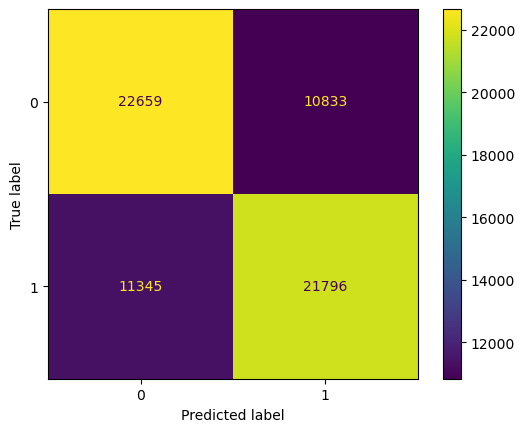

In [23]:
#Confusion matrix Logistic Regression report display
display = ConfusionMatrixDisplay(confusion_matrix=ConfM_LogR,display_labels=LogR.classes_)
display.plot()
plt.show()

## Decision Tree
### Max_depth 9


In [24]:
#Creating decision tree with depth 9

Decision_T_9 = DecisionTreeClassifier(max_depth=9, random_state=42, min_samples_leaf=500)

Decision_T_9.fit(x_train, y_train)
Decision_T_9_y_prediction = Decision_T_9.predict(x_test)


print("Accuracy training set depth=9: {:.3f}".format(Decision_T_9.score(x_train, y_train)))
print("Accuracy test set depth=9: {:.3f}".format(Decision_T_9.score(x_test, y_test)))


Accuracy training set depth=9: 0.904
Accuracy test set depth=9: 0.899


### Max_depth 3

In [25]:
#Creating decision tree with depth 3

Decision_T_3 = DecisionTreeClassifier(max_depth=3, random_state=42, min_samples_leaf=500)

Decision_T_3.fit(x_train, y_train)
Decision_T_3_y_prediction = Decision_T_3.predict(x_test)


print("Accuracy training set depth=3: {:.3f}".format(Decision_T_3.score(x_train, y_train)))
print("Accuracy test set depth=3: {:.3f}".format(Decision_T_3.score(x_test, y_test)))


Accuracy training set depth=3: 0.825
Accuracy test set depth=3: 0.817


### Max_depth 5

In [26]:
#Creating decision tree with depth 5

Decision_T_5 = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_leaf=500)

Decision_T_5.fit(x_train, y_train)
Decision_T_5_y_prediction = Decision_T_5.predict(x_test)


print("Accuracy training set depth=5: {:.3f}".format(Decision_T_5.score(x_train, y_train)))
print("Accuracy test set depth=5: {:.3f}".format(Decision_T_5.score(x_test, y_test)))


Accuracy training set depth=5: 0.881
Accuracy test set depth=5: 0.873


### Max_depth 6

In [27]:
#Creating decision tree with depth 6

Decision_T_6 = DecisionTreeClassifier(max_depth=6, random_state=42, min_samples_leaf=500)

Decision_T_6.fit(x_train, y_train)
Decision_T_6_y_prediction = Decision_T_6.predict(x_test)


print("Accuracy training set depth=6: {:.3f}".format(Decision_T_6.score(x_train, y_train)))
print("Accuracy test set depth=6: {:.3f}".format(Decision_T_6.score(x_test, y_test)))


Accuracy training set depth=6: 0.895
Accuracy test set depth=6: 0.889


### Max_depth 8

In [28]:
#Creating decision tree with depth 8

Decision_T_8 = DecisionTreeClassifier(max_depth=8, random_state=42, min_samples_leaf=500)

Decision_T_8.fit(x_train, y_train)
Decision_T_8_y_prediction = Decision_T_8.predict(x_test)


print("Accuracy training set depth=8: {:.3f}".format(Decision_T_8.score(x_train, y_train)))
print("Accuracy test set depth=8: {:.3f}".format(Decision_T_8.score(x_test, y_test)))


Accuracy training set depth=8: 0.903
Accuracy test set depth=8: 0.897


### Max_depth 7

In [29]:
#Creating decision tree with depth 8

Decision_T_7 = DecisionTreeClassifier(max_depth=7, random_state=42, min_samples_leaf=500)

Decision_T_7.fit(x_train, y_train)
Decision_T_7_y_prediction = Decision_T_7.predict(x_test)


print("Accuracy training set depth=7: {:.3f}".format(Decision_T_7.score(x_train, y_train)))
print("Accuracy test set depth=7: {:.3f}".format(Decision_T_7.score(x_test, y_test)))


Accuracy training set depth=7: 0.899
Accuracy test set depth=7: 0.894


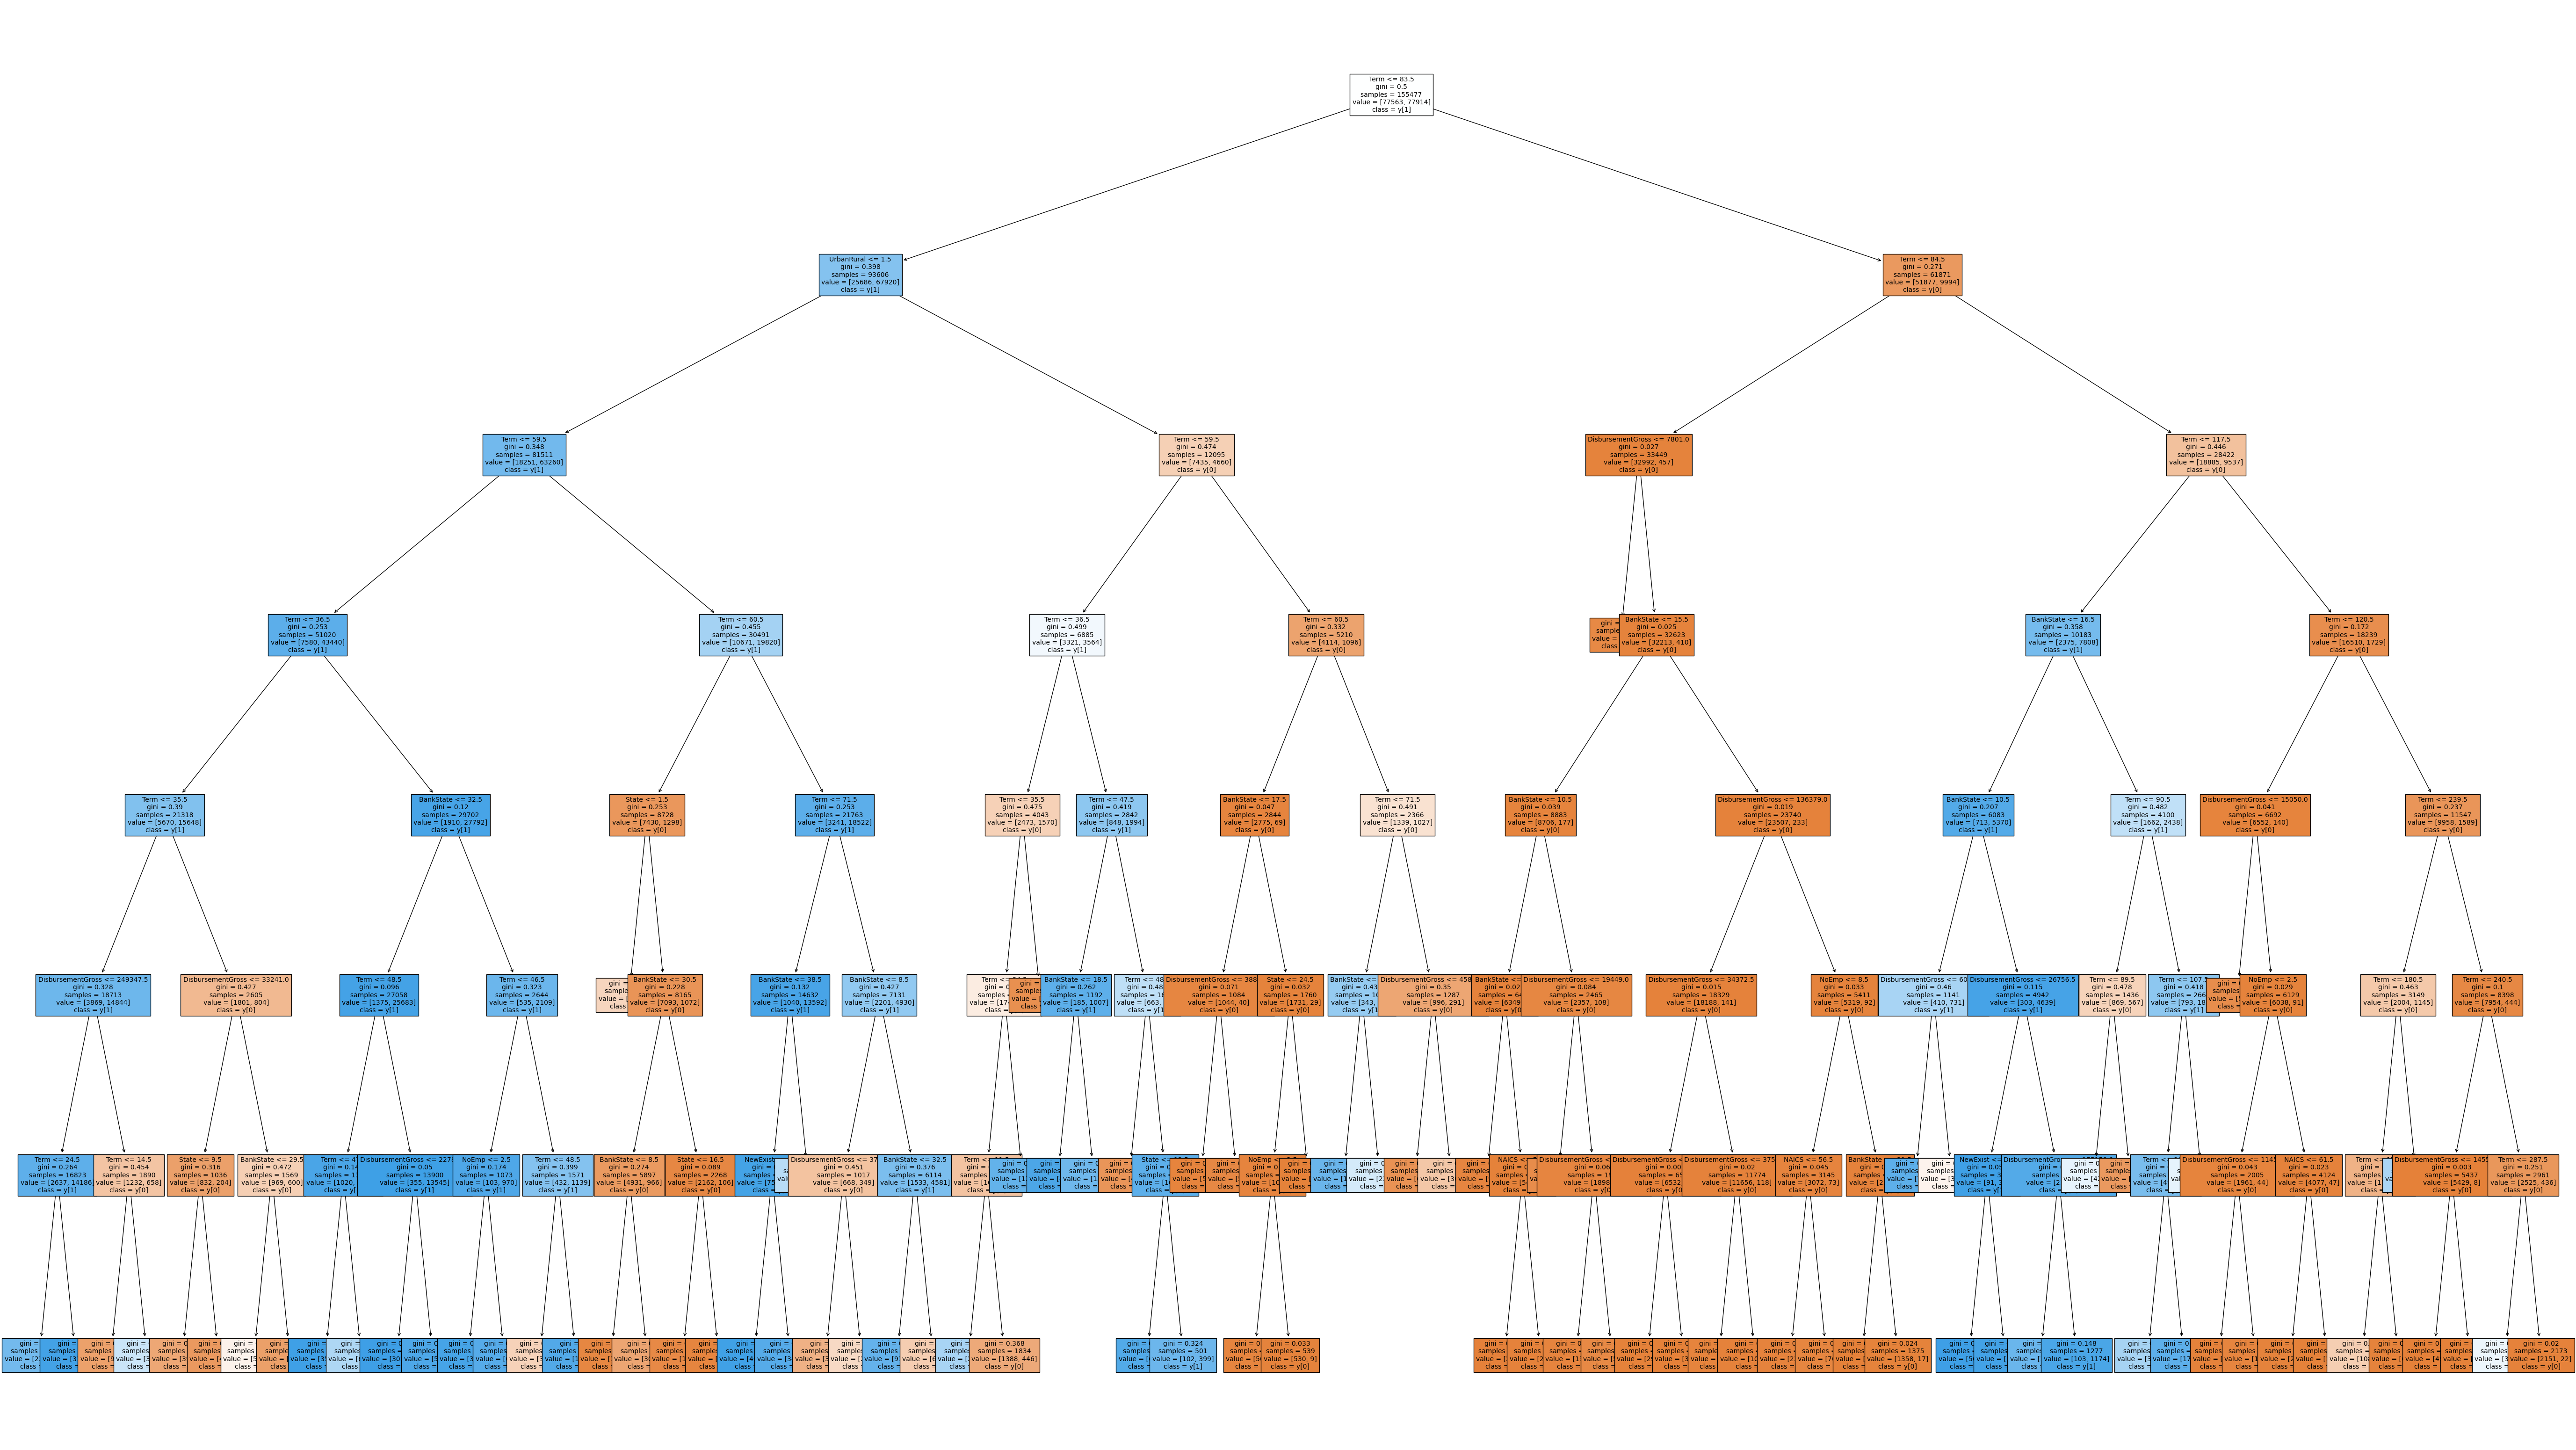

In [30]:
#Creating several instances of decisiontrees, one of each depth. (Source: Exercise 4)
#Will be saved to folder


plt.figure(figsize=(70,40))  # set plot size (denoted in inches)
tree.plot_tree(Decision_T_7,
               class_names=True,
               feature_names=list(x_train.columns), # label features with the column names from X
               filled=True, # color nodes to indicate majority class
               fontsize=10) 
plt.savefig('big_tree_7test.png', bbox_inches='tight') # save plot as png file 

### Gridsearch Decision Tree for crossvalidation

In [96]:
#DecisionTreeClassifier for GridSearch
Decision_T_Grid = DecisionTreeClassifier(random_state=42)


#Setting the different parameters
param_grid = {
    'min_samples_leaf': [500, 1000, 1250],
    'max_depth': [3,4,5,7,9]
}

Decision_T_Grid_Search = GridSearchCV(estimator=Decision_T_Grid, param_grid=param_grid, cv=10, n_jobs=1, verbose=2)

#Now fitting the model
Decision_T_Grid_Search.fit(x_train, y_train)


print("Best Score:", Decision_T_Grid_Search.best_score_)
print("Best Parameters:", Decision_T_Grid_Search.best_params_)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END ..................max_depth=3, min_samples_leaf=500; total time=   0.1s
[CV] END ..................max_depth=3, min_samples_leaf=500; total time=   0.1s
[CV] END ..................max_depth=3, min_samples_leaf=500; total time=   0.1s
[CV] END ..................max_depth=3, min_samples_leaf=500; total time=   0.1s
[CV] END ..................max_depth=3, min_samples_leaf=500; total time=   0.1s
[CV] END ..................max_depth=3, min_samples_leaf=500; total time=   0.1s
[CV] END ..................max_depth=3, min_samples_leaf=500; total time=   0.1s
[CV] END ..................max_depth=3, min_samples_leaf=500; total time=   0.1s
[CV] END ..................max_depth=3, min_samples_leaf=500; total time=   0.1s
[CV] END ..................max_depth=3, min_samples_leaf=500; total time=   0.1s
[CV] END .................max_depth=3, min_samples_leaf=1000; total time=   0.1s
[CV] END .................max_depth=3, min_sam

[CV] END .................max_depth=7, min_samples_leaf=1000; total time=   0.3s
[CV] END .................max_depth=7, min_samples_leaf=1000; total time=   0.3s
[CV] END .................max_depth=7, min_samples_leaf=1000; total time=   0.3s
[CV] END .................max_depth=7, min_samples_leaf=1000; total time=   0.3s
[CV] END .................max_depth=7, min_samples_leaf=1000; total time=   0.3s
[CV] END .................max_depth=7, min_samples_leaf=1000; total time=   0.3s
[CV] END .................max_depth=7, min_samples_leaf=1000; total time=   0.3s
[CV] END .................max_depth=7, min_samples_leaf=1000; total time=   0.3s
[CV] END .................max_depth=7, min_samples_leaf=1000; total time=   0.3s
[CV] END .................max_depth=7, min_samples_leaf=1250; total time=   0.3s
[CV] END .................max_depth=7, min_samples_leaf=1250; total time=   0.3s
[CV] END .................max_depth=7, min_samples_leaf=1250; total time=   0.3s
[CV] END .................ma

In [97]:
#Creating a new Decision Tree after applying Crossvalidation with grid,
#- for the best parameters (just as)

Decision_T_Grid = DecisionTreeClassifier(max_depth=9, random_state=42, min_samples_leaf=500)

Decision_T_Grid.fit(x_train, y_train)
Decision_T_Grid_y_prediction = Decision_T_Grid.predict(x_test)

print("Accuracy training set depth from grid: {:.3f}".format(Decision_T_Grid.score(x_train, y_train)))
print("Accuracy test set depth from grid: {:.3f}".format(Decision_T_Grid.score(x_test, y_test)))


Accuracy training set depth from grid: 0.904
Accuracy test set depth from grid: 0.899


**Decision Tree Report**

In [33]:
print(classification_report(y_test, Decision_T_Grid_y_prediction))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90     33492
           1       0.88      0.92      0.90     33141

    accuracy                           0.90     66633
   macro avg       0.90      0.90      0.90     66633
weighted avg       0.90      0.90      0.90     66633



In [34]:
#Confusion matrix decision tree
ConfM_Decision_T = confusion_matrix(y_test, Decision_T_Grid_y_prediction)
print(ConfM_Decision_T)


[[29466  4026]
 [ 2711 30430]]


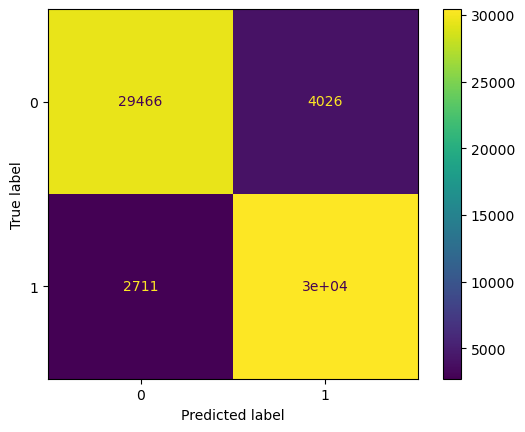

In [35]:
#Confusion matrix Decision Tree report display
display = ConfusionMatrixDisplay(confusion_matrix=ConfM_Decision_T,display_labels=Decision_T_Grid.classes_)
display.plot()
plt.show()

 **Conclusion**
 
We can see that by using hyper optimization GridSearchCV with 10 folds, (CV=10) and with parameters ranging with max_depth = [3,4,5,7,9] and min_samples_leaf=[500, 100,1250] we got a better accuracy of prediction, at depth 9:


* Precision: Being 0.92 = 92% Accurate of what it computed, in terms of correctly predicted instances to the loans being paid fully back, but only 0.89 = 89% on the loans which are defaulting --> The model is more accurate in predicting success


* Recall: Out of the instances that were predicted to default, 0.92 = 92% of them were correct - but only 0.88 = 88% of the predicted to be faid fully back, were correct

## K-Nearest Neighbor

In [36]:
#'k' refers to the number of nearest neighbors that are considered when making a prediction for a new data point.
#It is a hyperparameter needed to be chosen, before applying algorithm to dataset.

#We start by displaying data, to adress the values of the dataset
x_train

,State,BankState,NAICS,Term,NoEmp,NewExist,FranchiseCode,UrbanRural,LowDoc,DisbursementGross
45010,33,17,53,42,1,1,0,2,0,49505
48434,13,48,52,64,3,1,0,1,0,59297
29816,12,30,81,18,3,1,0,2,0,45964
140273,14,53,23,24,2,2,0,1,0,350000
84152,2,25,23,84,2,2,0,1,0,5000
...,...,...,...,...,...,...,...,...,...,...
119879,10,24,44,84,2,2,0,2,0,58500
103694,30,20,54,36,4,1,0,2,0,25000
131932,11,39,44,40,4,1,0,2,0,35000
146867,8,22,62,84,5,1,0,1,0,70000


* As we can tell, the dataset has drastically different scales of values, in the different columns.
* It would be impossible to analyse trends, patterns and comparison when theres such a big different.
* We therefore need to modify the values, so they alle fall into 'same scale' for comparison.

* In this case, we will use Min-Max Normalization.

#Source: https://www.geeksforgeeks.org/how-to-scale-pandas-dataframe-columns/

In [37]:
#Defining function
scaler = MinMaxScaler()

#defining two new variables for x_train and x_test, for the scaler function
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)


#DIsplaying result
x_test_scale, x_train_scale

(array([[5.60000000e-01, 7.88461538e-01, 4.07407407e-01, ...,
         0.00000000e+00, 0.00000000e+00, 2.05847847e-03],
        [6.80000000e-01, 2.11538462e-01, 4.56790123e-01, ...,
         0.00000000e+00, 0.00000000e+00, 1.27928040e-03],
        [6.60000000e-01, 5.76923077e-01, 4.56790123e-01, ...,
         0.00000000e+00, 0.00000000e+00, 1.16298218e-03],
        ...,
        [7.40000000e-01, 4.61538462e-01, 4.19753086e-01, ...,
         0.00000000e+00, 0.00000000e+00, 1.27928040e-03],
        [2.89543692e-01, 7.69230769e-02, 5.30864198e-01, ...,
         0.00000000e+00, 0.00000000e+00, 5.34971805e-03],
        [0.00000000e+00, 2.11538462e-01, 2.46913580e-01, ...,
         0.00000000e+00, 0.00000000e+00, 4.07043764e-04]]),
 array([[0.64      , 0.30769231, 0.51851852, ..., 1.        , 0.        ,
         0.0039769 ],
        [0.24      , 0.90384615, 0.50617284, ..., 0.        , 0.        ,
         0.00483267],
        [0.22      , 0.55769231, 0.86419753, ..., 1.        , 0.        ,

In [38]:
#Finding the best parameters, based on a scoring metric. In this case, accuracy is chosen. Using Grid Search

knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [5, 25, 50, 100],
         'knn__weights': ['uniform', 'distance']}]
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
print("Starting grid search")
gs_knn.fit(x_train_scale, y_train)
print("Grid search completed")
print("Best parameters:", gs_knn.best_params_)


Starting grid search
Grid search completed
Best parameters: {'knn__n_neighbors': 5, 'knn__weights': 'distance'}


* From the result, the best accuracy is obtained with the least amount of neighbour-parameter, 5 and The weight is distance.

In [39]:
#Creating a new classifier, and checking score, with the previous best parameter results for neighbors and weights.

# Create KNN classifier
knn_grid = KNeighborsClassifier(n_neighbors = 5, weights='distance')

# Fit the classifier to the data
knn_grid.fit(x_train_scale,y_train)
knn_grid_y_prediction = knn_grid.predict(x_train_scale)

#printing the result
print("accuracy training set with grid: {:.3f}".format(knn_grid.score(x_train_scale, y_train)))
print("accuracy test set with grid: {:.3f}".format(knn_grid.score(x_test_scale, y_test)))

accuracy training set with grid: 1.000
accuracy test set with grid: 0.804


* From the score result, we can see that the training set get's an accuracy of 1.00 = 100% It
* -And the test set with an accuracy of 0.80 = 80%. This is unrealistic, which indicates overfitting.
* We can therefore observe that the since the model is performing exceptionally well on the training set rather than test set, it suggest the model is memorizing the training adata, and therefore may not generealize well to new unsenne data

* We can therefore already conclude, that having a model with 5 neigbours and weighted scoring is not appropiate, as it does-
* -not give a realistic picture. The model can therefore not be considdered reliable.

In [51]:
#Running the Grid Search again, with different neigbors and with uniform (unweighted average), instead of weighted average, to find
# - Optimal and realistic parameters.

knn_pipe = Pipeline([('mms', MinMaxScaler()),
                     ('knn', KNeighborsClassifier())])
params = [{'knn__n_neighbors': [150, 200, 250, 300],
         'knn__weights': ['uniform']}]
gs_knn = GridSearchCV(knn_pipe,
                      param_grid=params,
                      scoring='accuracy',
                      cv=10)
print("Starting grid search")
gs_knn.fit(x_train_scale, y_train)
print("Grid search completed")
print("Best parameters:", gs_knn.best_params_)


Starting grid search
Grid search completed
Best parameters: {'knn__n_neighbors': 150, 'knn__weights': 'uniform'}


In [62]:
#Based on the new optimal parameters, a new classifier will be made, and score asssesed.

# Create KNN classifier
knn_grid_new = KNeighborsClassifier(n_neighbors = 150, weights='uniform')

# Fit the classifier to the data
knn_grid_new.fit(x_train_scale,y_train)
knn_grid_new_y_prediction = knn_grid_new.predict(x_test_scale)

#printing the result
print("accuracy training set with grid: {:.3f}".format(knn_grid_new.score(x_train_scale, y_train)))
print("accuracy test set with grid: {:.3f}".format(knn_grid_new.score(x_test_scale, y_test)))

accuracy training set with grid: 0.809
accuracy test set with grid: 0.766


* New grid search with a range of new parameters, for neighbors and weight.
* The score shows more optimal parameters, not leaning towards unrealistic results, and therefore a much more reliable and optimal model. Though it is not the best result we could have hoped for

* neighbors = 150,
* weights = uniform

### Manually finding optimal parameters with different neighbors

In [42]:
#NEIGHBOR 150 WEIGHT UNIFORM
#KNC150U = KNeighborsClassifier(n_neighbors=150)


#KNC150U.fit(x_train_scale, y_train)
#KNC150U_y_pred = KNC100U.predict(x_test_scale)
#print("Accuracy on training set N=100: {:.3f}".format(KNC150U.score(x_train_scale, y_train)))
#print("Accuracy on test set N=100: {:.3f}".format(KNC150U.score(x_test_scale, y_test)))

In [43]:
#NEIGHBOR 125 WEIGHT UNIFORM
#KNC125U = KNeighborsClassifier(n_neighbors=125)


#KNC125U.fit(x_train_scale, y_train)
#KNC125U_y_pred = KNC125U.predict(x_test_scale)
#print("Accuracy on training set N=100: {:.3f}".format(KNC125U.score(x_train_scale, y_train)))
#print("Accuracy on test set N=100: {:.3f}".format(KNC125U.score(x_test_scale, y_test)))

In [44]:
#NEIGHBOR 110 WEIGHT UNIFORM
#KNC110U = KNeighborsClassifier(n_neighbors=110)


#KNC110U.fit(x_train_scale, y_train)
#KNC110U_y_pred = KNC125U.predict(x_test_scale)
#print("Accuracy on training set N=110: {:.3f}".format(KNC110U.score(x_train_scale, y_train)))
#print("Accuracy on test set N=110: {:.3f}".format(KNC110U.score(x_test_scale, y_test)))

In [45]:
#NEIGHBOR 115 WEIGHT UNIFORM
#KNC115U = KNeighborsClassifier(n_neighbors=115)


#KNC115U.fit(x_train_scale, y_train)
#KNC115U_y_pred = KNC125U.predict(x_test_scale)
#print("Accuracy on training set N=115: {:.3f}".format(KNC115U.score(x_train_scale, y_train)))
#print("Accuracy on test set N=115: {:.3f}".format(KNC115U.score(x_test_scale, y_test)))

In [46]:
#NEIGHBOR 170 WEIGHT UNIFORM
#KNC170U = KNeighborsClassifier(n_neighbors=170)


#KNC170U.fit(x_train_scale, y_train)
#KNC170U_y_pred = KNC170U.predict(x_test_scale)
#print("Accuracy on training set N=170: {:.3f}".format(KNC170U.score(x_train_scale, y_train)))
#print("Accuracy on test set N=170: {:.3f}".format(KNC170U.score(x_test_scale, y_test)))

In [47]:
#NEIGHBOR 200 WEIGHT UNIFORM
#KNC200U = KNeighborsClassifier(n_neighbors=200)


#KNC200U.fit(x_train_scale, y_train)
#KNC200U_y_pred = KNC200U.predict(x_test_scale)
#print("Accuracy on training set N=200: {:.3f}".format(KNC200U.score(x_train_scale, y_train)))
#print("Accuracy on test set N=200: {:.3f}".format(KNC200U.score(x_test_scale, y_test)))

In [48]:
#NEIGHBOR 225 WEIGHT UNIFORM
#KNC200U = KNeighborsClassifier(n_neighbors=225)


#KNC225U.fit(x_train_scale, y_train)
#KNC225U_y_pred = KNC225U.predict(x_test_scale)
#print("Accuracy on training set N=225: {:.3f}".format(KNC225U.score(x_train_scale, y_train)))
#print("Accuracy on test set N=225: {:.3f}".format(KNC225U.score(x_test_scale, y_test)))

In [49]:
#NEIGHBOR 150 WEIGHT UNIFORM
#KNC150U = KNeighborsClassifier(n_neighbors=250)


#KNC150U.fit(x_train_scale, y_train)
#KNC150U_y_pred = KNC100U.predict(x_test_scale)
#print("Accuracy on training set N=100: {:.3f}".format(KNC150U.score(x_train_scale, y_train)))
#print("Accuracy on test set N=100: {:.3f}".format(KNC150U.score(x_test_scale, y_test)))

**K-Nearest Neighbor report**

In [63]:
print(classification_report(y_test, knn_grid_new_y_prediction))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79     33492
           1       0.82      0.67      0.74     33141

    accuracy                           0.77     66633
   macro avg       0.77      0.77      0.76     66633
weighted avg       0.77      0.77      0.76     66633



In [64]:
#Confusion matrix K-Nearest Neighbor
ConfM_K_Neighbor = confusion_matrix(y_test,  knn_grid_new_y_prediction)
print(ConfM_K_Neighbor)


[[28721  4771]
 [10837 22304]]


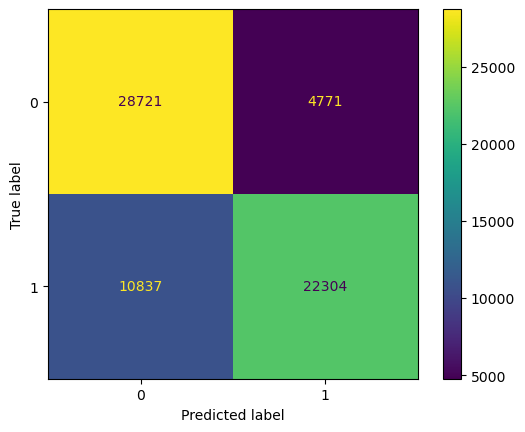

In [69]:
#Confusion matrix K-Nearest Neighbor
display = ConfusionMatrixDisplay(confusion_matrix=ConfM_K_Neighbor,display_labels=knn_grid_new.classes_)
display.plot()
plt.show()